<a href="https://colab.research.google.com/github/shreythapar/ML_Dataset/blob/main/ML_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import io 
import pandas as pd

df2 = pd.read_csv("https://raw.githubusercontent.com/shreythapar/ML_Dataset/main/diabetes2.csv")
df2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [35]:
X = df2.iloc[:, [6,7]].values
Y = df2.iloc[:,8].values
print(X)
print(Y)

[[ 0.627 50.   ]
 [ 0.351 31.   ]
 [ 0.672 32.   ]
 ...
 [ 0.245 30.   ]
 [ 0.349 47.   ]
 [ 0.315 23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 

In [36]:
import numpy as np
unique_labels = df2.iloc[:,4].unique()
print(unique_labels)
unique_labels=np.array(unique_labels)
type(unique_labels)

[  0  94 168  88 543 846 175 230  83  96 235 146 115 140 110 245  54 192
 207  70 240  82  36  23 300 342 304 142 128  38 100  90 270  71 125 176
  48  64 228  76 220  40 152  18 135 495  37  51  99 145 225  49  50  92
 325  63 284 119 204 155 485  53 114 105 285 156  78 130  55  58 160 210
 318  44 190 280  87 271 129 120 478  56  32 744 370  45 194 680 402 258
 375 150  67  57 116 278 122 545  75  74 182 360 215 184  42 132 148 180
 205  85 231  29  68  52 255 171  73 108  43 167 249 293  66 465  89 158
  84  72  59  81 196 415 275 165 579 310  61 474 170 277  60  14  95 237
 191 328 250 480 265 193  79  86 326 188 106  65 166 274  77 126 330 600
 185  25  41 272 321 144  15 183  91  46 440 159 540 200 335 387  22 291
 392 178 127 510  16 112]


numpy.ndarray

In [37]:
output=pd.DataFrame(Y)
output.head()

,0
0,1
1,0
2,1
3,0
4,1


In [38]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [39]:
X_Train.shape

(576, 2)

In [40]:
Y_Train.shape

(576,)

In [41]:
X_Test.shape

(192, 2)

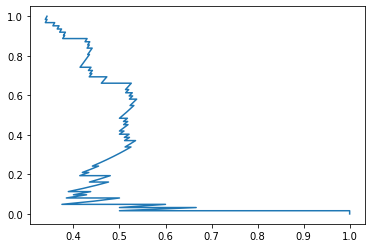

In [42]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve,roc_curve,auc
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_Train, Y_Train)

# Predicting the test set results

Y_Pred = classifier.predict(X_Test)
prob_score=classifier.predict_proba(X_Test)
y_scores = classifier.decision_function(X_Test)
precision, recall, thresholds = precision_recall_curve(Y_Test, y_scores)
plt.figure()
plt.plot(precision, recall, label = 'Precision-Recall Curve')

In [43]:
Y_Pred[0:5]

array([0, 0, 0, 1, 0])

[[116  14]
 [ 50  12]]


Text(0.5, 4.405514997941804, 'Predicted label')

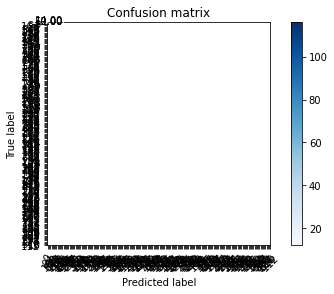

In [44]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix,precision_score,recall_score

cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)
r=cm.shape[0]
c=cm.shape[1]
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(unique_labels))
plt.xticks(tick_marks, unique_labels, rotation=45)
plt.yticks(tick_marks, unique_labels)

thresh = cm.max() / 2.
for i in range(r):
    for j in range(c):
        plt.text(j, i, format(cm[i, j], '0.2f'),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
# Visualising the Training set results 

#from matplotlib.colors import ListedColormap
#X_Set, Y_Set = X_Train, Y_Train
#X1, X2 = np.meshgrid(np.arange(start = X_Set[:,0].min() -1, stop = X_Set[:, 0].max() +1, step = 0.01),
#                     np.arange(start = X_Set[:,1].min() -1, stop = X_Set[:, 1].max() +1, step = 0.01))

#plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 #            alpha = 0.75, cmap = ListedColormap(('red', 'green')))

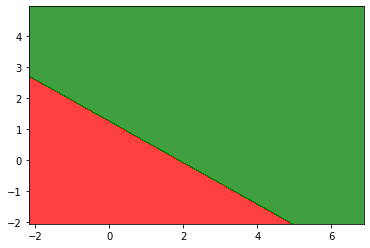

In [45]:
# Visualising the Training set results 

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:,0].min() -1, stop = X_Set[:, 0].max() +1, step = 0.01),
                    np.arange(start = X_Set[:,1].min() -1, stop = X_Set[:, 1].max() +1, step = 0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))

In [46]:
from sklearn.metrics import classification_report
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78       130
           1       0.46      0.19      0.27        62

    accuracy                           0.67       192
   macro avg       0.58      0.54      0.53       192
weighted avg       0.62      0.67      0.62       192



In [47]:
from sklearn.metrics import precision_score, recall_score
print("Precision score: ",precision_score(Y_Test,Y_Pred))
print("Recall score: ",recall_score(Y_Test,Y_Pred))

Precision score:  0.46153846153846156
Recall score:  0.1935483870967742


In [48]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds = roc_curve(Y_Test, Y_Pred)
auc = roc_auc_score(Y_Test, Y_Pred)
print('AUC: %.3f' % auc)

AUC: 0.543


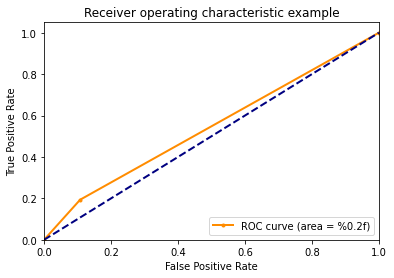

In [49]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',marker='.',
         lw=2, label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [50]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_Train, Y_Train)
Y_Pred_cv=clf.predict(X_Test)
prob_score_cv=clf.predict_proba(X_Test)
#print(prob_score_cv)
y_scores_cv = clf.decision_function(X_Test)
print(y_scores_cv)

[-0.18291265 -1.1194653  -1.05039542  0.2079066  -0.53907291 -1.1979853
 -0.2271077   0.8087036   0.14334623  0.11203747 -0.47334218  0.73117099
  0.60864262  0.24109678 -0.14783366 -0.37272282 -0.27605298 -1.3554023
  0.53346179 -0.73899389 -0.39801766 -0.91601849 -0.6732165  -0.33651645
 -1.07846573 -1.09275939 -0.77990014  0.29606336 -1.17428819 -0.94338142
  0.26714936 -1.11053222 -0.66832627 -0.50790046 -1.27500089 -0.64791797
 -0.48354264 -1.29122265 -1.15999452 -1.12792803 -0.80251653 -1.04832732
 -0.65906283 -1.19850232 -0.13377333 -1.03549139 -1.47388783 -1.09736594
 -0.50192952 -0.82531959 -0.74407079 -1.24533284 -0.17143743 -0.47705468
 -1.06026921 -1.42108636 -0.84417313 -1.10723973 -0.98320695 -0.97399018
 -0.53639077 -0.85155514 -1.39687224 -0.5152358  -0.93200323  0.31284881
 -0.15540234 -0.57137274 -0.36505712 -0.62760669 -1.44426645 -0.73866354
 -1.20146446  0.8251587  -0.92255312 -0.9828766  -0.25409361 -0.03470872
 -0.7548853  -1.01644749 -0.5526592  -1.08344929 -0.6

In [51]:
print(classification_report(Y_Test,Y_Pred_cv))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78       130
           1       0.46      0.19      0.27        62

    accuracy                           0.67       192
   macro avg       0.58      0.54      0.53       192
weighted avg       0.62      0.67      0.62       192

